前面我们接触了一些机器学习的项目，应该感觉到机器学习的程序都非常简单，有些特有的库和函数，如果熟悉了以后也没什么难度，那么机器学习和数据分析的难点在哪里呢？  

在我们学习的例子中，往往数据都是很完整的，而且例子的数据和结果直接相关。但是在真实的项目中，往往有更大量的数据，但是数据可能有缺失，重复，甚至错误。那么我们如何使用这些数据？在使用前如何处理这些数据让它们符合要求？这就是数据清洗。  
在这些大量的数据中，哪些数据和我们需要的结果有关？哪些无关？有关的哪些影响大？哪些影响小？如何从中选择合适的数据，如何确定权重，如何选择合适的基础模型进行训练？甚至在实际应用中，很多情况下是使用不止一种模型或者进行的一定的组合，才能达到最好的效果。这就是特征工程。  

一个机器学习的项目，可能有80%-90%的时间都用在特征工程上，而项目结果的好坏，也取决与特征工程。  

下面我们用一个略微真实一点的项目，来演示一个有点接近实际情况的数据分析是如何进行的。  

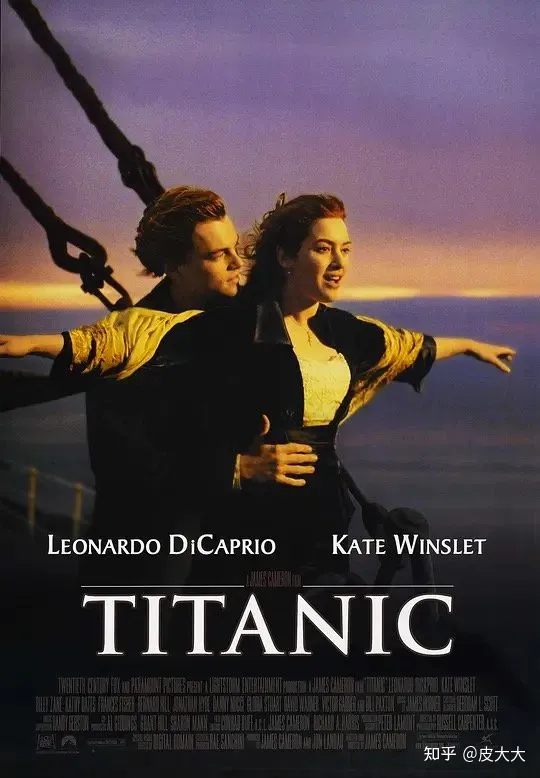
## 故事背景
泰坦尼克号: 是当时世界上体积最庞大、内部设施最豪华的客运轮船, 于1909年3月31日动工建造, 1912年4月2日完工试航. 于1912年4月10日, 在南安普敦港的海洋码头, 启程驶往纽约, 开始了它的第一次, 也是最后一次的航行.   

船上时间为1912年4月14日23时40分左右, 泰坦尼克号与一座冰山相撞, 造成水密舱进水, 次日凌晨2时20分左右沉没. 2224名船员和乘客中1502人遇难, 造成如此巨大的伤亡原因之一是当时认为这艘船从设计商是不可能沉没的，船上没有足够的救生艇供乘客和船员使用.   
在这次灾难中能否幸存下来难免会有些运气成分, 但是有些人比其他人更可能生存下来。这个项目通过机器学习来分析旅客的一些信息，判断旅客的生存可能性。

这个项目是Kaggle网站的入门项目，也成为机器学习进行数据分析的Hello World应用，非常流行的入门项目。  
项目的Kaggle页面： https://www.kaggle.com/c/titanic  



## 1. 提出问题  
什么样的人在Titanic中更能存活。


## 2. 数据清洗

### 2.1 导入数据  
从Kaggle泰坦尼克号项目页面下载数据：https://www.kaggle.com/c/titanic  

本项目提供了两份数据: train.csv文件作为训练集构建与生存相关的模型; 另一份test.csv文件是系统测试集, 用我们构建出来的模型预测生存情况.  


In [78]:
#导入处理数据包
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#导入数据
#训练数据集
train = pd.read_csv("./titanic/train.csv")
#测试数据集
test  = pd.read_csv("./titanic/test.csv")
print ('训练数据集:',train.shape,'测试数据集:',test.shape)

训练数据集: (891, 12) 测试数据集: (418, 11)


可以看到训练集有891条数据，12个参数。测试集有418条数据，11个参数。  
看一下有哪些参数。

In [79]:
train.info()
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass  

参数含义如下：   
PassengerId：旅客编号    
Survived：是否存活  0 = No, 1 = Yes  
Pclass：舱位等级 1 = 1st, 2 = 2nd, 3 = 3rd  
Name：旅客姓名    
Sex： 旅客性别   
Age： 旅客年龄   
SibSp：  同船配偶以及兄弟姐妹的人数  
Parch：  同船父母或者子女的人数  
Ticket：Ticket number  
Fare：船票价格  
Cabin：船舱号  
Embarked： 登船港口  
  
对比可以看到，train数据比test数据多一个参数surviced，就是是否最终存活。这也是test数据集需要预测的目标参数。  
注意这里的test数据集实际是最终提交给Kaggle以后Kaggle用来评估模型的数据集，因为没有Survived数据，所以对于我们是没有用处的。我们的模型训练还是要从train数据里面再分成自己的测试集和训练集，拿来训练模型。
 

### 2. 缺失数据处理

为了方便对数据进行整体的统计和分析，我们先把训练集和测试集合并。

在一些项目中，由于数据来源的不同，可能表格中不同名字的参数表达的是同一个含义。例如性别在有些表格用的sex，有些用sexual。或者同样的数据，表达的方式不一样。例如sex在有些表格中是Male/Female，有些是M/F，甚至是0/1，True/False。这些数据在合并前需要事先处理并且统一到一样的名字和表达。   

在本项目中，数据不需要这些处理。

In [80]:
rowNum_train=train.shape[0]
rowNum_test=test.shape[0]
print('kaggle训练数据集有多少行数据：',rowNum_train)
print('kaggle测试数据集有多少行数据：',rowNum_test,)
#合并数据集，方便同时对两个数据集进行清洗
full = pd.concat([train, test], ignore_index=True )
print ('合并后的数据集:',full.shape)

full.info()

kaggle训练数据集有多少行数据： 891
kaggle测试数据集有多少行数据： 418
合并后的数据集: (1309, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB




使用info函数看到的信息中，non-null域表示这个参数的非空记录的数量。如果某条记录的某个参数为null，则表示这条记录的这个参数数据缺失。  
train数据集的Age，Cabin和Embarked参数有缺失数据。test测试集的Age，Fare，Cabin有缺失数据。其中age和cabin参数缺失比较严重。



这为我们下一步数据清洗指明了方向，只有知道哪些数据缺失数据，我们才能有针对性的处理。 


对于缺失数据如何处理，很多时候需要根据常识和经验做出判断。数据缺失量的多少，也会造成影响大小不同，也需要采取不同的处理方法。同样，对于缺失数据处理是否合适，也会影响最后分析的结果。  

其中数据类型列：年龄（Age）、船舱号（Cabin）里面有缺失数据：   

1）年龄（Age）里面数据总数是1046条，缺失了1309-1046=263，缺失率263/1309=20%  

2）船票价格（Fare）里面数据总数是1308条，缺失了1条数据，缺失比较少  

对于数值型的缺失数据，常用的处理办法有：  
    - 使用常数填充，如用 0、平均值、中位数或众数等。  
    - 使用前一个或后一个值来填充，这在数据为时间序列时尤其有用。  
    - 使用模型预测的值填充，例如，可以使用线性回归、决策树等模型根据其他变量预测缺失值。  
    - 使用插值方法。插值是一种更为复杂的填充方法，特别适用于处理时间序列或有序数据集中的缺失值。Pandas 提供了多种插值方法，如线性插值、多项式插值等.  
    - 删除记录.如果数据集足够大，且缺失数据的数量不多，可以考虑直接删除包含缺失值的行。这是最简单也是最直接的方法，但它可能会导致信息的损失，尤其是当删除的数据占比较大或者这些数据本身就包含重要信息时。  
  
本案例用平均数来填充缺失值。

In [81]:
print('处理前：')
full.info()
#年龄(Age)
full['Age']=full['Age'].fillna( full['Age'].mean() )
#船票价格(Fare)
full['Fare'] = full['Fare'].fillna( full['Fare'].mean() )
print('处理后：')
full.info()

处理前：
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB
处理后：
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64 


字符串列：  

1）登船港口（Embarked）里面数据总数是1307，只缺失了2条数据，缺失比较少  

2）船舱号（Cabin）里面数据总数是295，缺失了1309-295=1014，缺失率=1014/1309=77.5%，缺失比较大  

我们分析一下两个参数段包含的数据内容。


In [82]:
print(full['Embarked'].value_counts())

pd.set_option('display.max_rows', None)  # 系统缺失只显示数组的前5行和后5行，这些设置成None 表示显示所有行
print(full['Cabin'].value_counts())
pd.reset_option('display.max_rows')      # 恢复原设置

S    914
C    270
Q    123
Name: Embarked, dtype: int64
C23 C25 C27        6
G6                 5
B57 B59 B63 B66    5
C22 C26            4
F33                4
F2                 4
B96 B98            4
C78                4
F4                 4
D                  4
E34                3
B58 B60            3
A34                3
E101               3
C101               3
B51 B53 B55        3
C31                2
C55 C57            2
D37                2
C54                2
B35                2
C32                2
C7                 2
C124               2
E50                2
C6                 2
E44                2
C46                2
C92                2
D21                2
C116               2
C85                2
D20                2
B45                2
E8                 2
E121               2
E24                2
C62 C64            2
F G63              2
B20                2
B5                 2
B71                2
C126               2
D17                2
D19                2

可以看到，Embarked数据有3种，其中最多的是S，有914（70%）。缺失数据两条，影响比较小，我们选择把这两条缺失数据设置成最多的S。  
Cabin数据有很多种，但是每个占比都很低，最多的只有6，多数是1，没有有明显优势的数据。我们选择把缺失数据设置成一个新值U，表示unknown。  
现在除了Survived参数没有缺失数据了。


In [83]:
full['Embarked'] = full['Embarked'].fillna( 'S' )
full['Cabin'] = full['Cabin'].fillna( 'U' )
full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1309 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1309 non-null   float64
 10  Cabin        1309 non-null   object 
 11  Embarked     1309 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB


### 3. 数据特征分析 

下一步，需要对每个参数的数据进行分析。如果可能，讲一些不易处理的字符数据转换为数值，可以提高处理的性能。
首先看一下数据的内容。

In [84]:
print(full.describe())  # 直接使用describe可以查看基于每个参数的统计数据

print(full[['Name','Sex','Ticket','Cabin','Embarked']].describe()) # 这种方式可以显示每个参数的取值数据

       PassengerId    Survived       Pclass          Age        SibSp  \
count  1309.000000  891.000000  1309.000000  1309.000000  1309.000000   
mean    655.000000    0.383838     2.294882    29.881138     0.498854   
std     378.020061    0.486592     0.837836    12.883193     1.041658   
min       1.000000    0.000000     1.000000     0.170000     0.000000   
25%     328.000000    0.000000     2.000000    22.000000     0.000000   
50%     655.000000    0.000000     3.000000    29.881138     0.000000   
75%     982.000000    1.000000     3.000000    35.000000     1.000000   
max    1309.000000    1.000000     3.000000    80.000000     8.000000   

             Parch         Fare  
count  1309.000000  1309.000000  
mean      0.385027    33.295479  
std       0.865560    51.738879  
min       0.000000     0.000000  
25%       0.000000     7.895800  
50%       0.000000    14.454200  
75%       0.000000    31.275000  
max       9.000000   512.329200  
                        Name   Sex  

这里可以看到，Name参数有1309条数据，其中有1307个不同的值，出现最多的是Connolly, Miss. Kate，出现2次。  
而Sex参数有2个不同的值，出现最多的是male，出现843次。对于每个参数，还可以有针对性的深入了解。


### 3.1 PassengerId
Id仅仅是用来标识乘客的唯一性, 按照常识推断，Id与最终生存与否无关。这个参数不需要参加训练。

在某些情况下，Id可能体现出与最终生存的相关性。比如Id的编码方法与船舱等级相关。那么这种相关性实际是船舱等级造成的结果，实际产生影响的还是船舱等级。所以分析船舱等级数据即可。

### 3.2 PClass
船舱等级, 一等舱是整个船最昂贵奢华的地方, 有钱人才能享受, 想必一等舱的有钱人比三等舱的穷人更容易幸存, 到底是不是呢? 用数据说话:

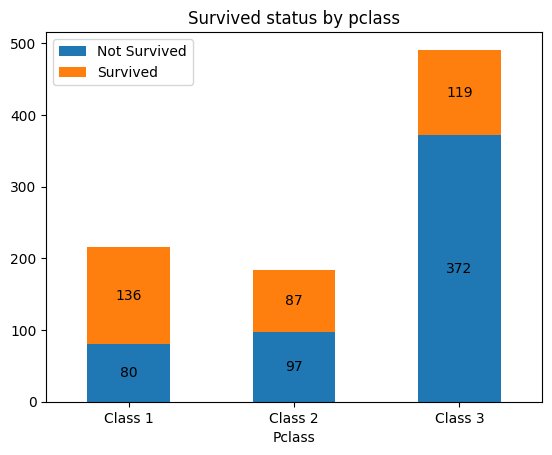

In [85]:

# 因为只有训练数据才有生存信息，先把前891条训练数据取出来
df_train = full.iloc[:891].copy()

# 生成Pclass_Survived的列联表
Pclass_Survived = pd.crosstab(df_train['Pclass'], df_train['Survived'])

# 绘制堆积柱形图，并保存轴对象
ax = Pclass_Survived.plot(kind='bar', stacked=True)

# 累计高度，用于定位文本标签
cumulative_heights = np.zeros(len(Pclass_Survived))

# 添加数据标签
for i, col in enumerate(Pclass_Survived.columns):
    # 遍历每列数据以放置文本
    for j in range(len(Pclass_Survived)):
        rect = ax.patches[i * len(Pclass_Survived) + j]
        height = rect.get_height()
        cumulative_heights[j] += height
        center = cumulative_heights[j] - height / 2  # 计算中心位置
        ax.text(rect.get_x() + rect.get_width() / 2, center, str(Pclass_Survived[col][j+1]), ha='center', va='center')


# 修改图例
ax.legend(["Not Survived", "Survived"])

# 修改x轴标签
ax.set_xticklabels(["Class 1", "Class 2", "Class 3"], rotation=360)
plt.title('Survived status by pclass')

# 显示图形
plt.show()


可以看到一等舱人员的幸存机会远大于三等舱, 果然和船舱等级相关.

### 3.3 Sex参数

我们一直听说泰坦尼克沉没的时候，展现了传统的绅士作风，很多男士把救生的机会优先让给了女士。真实情况是不是这样呢？让数据说话，我们看一下性别和生存的关系。

Text(0.5, 1.0, 'Survived status by sex')

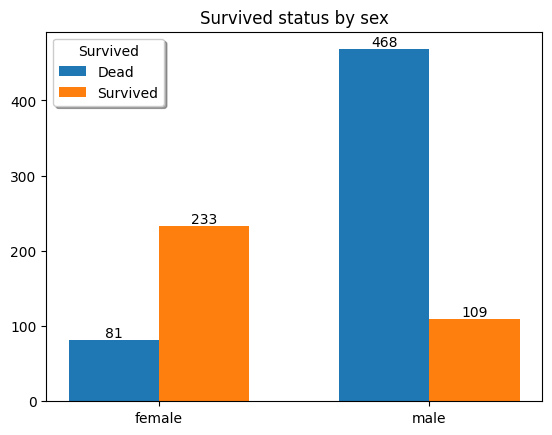

In [86]:
#生成列联表
Sex_Survived = pd.crosstab(df_train['Sex'], df_train['Survived'])
Survived_len = len(Sex_Survived.count())
Sex_index = np.arange(len(Sex_Survived.index))
single_width = 0.35
labels = ["Dead","Survived"]
for i in range(Survived_len):
    SurvivedName = Sex_Survived.columns[i]
    SexCount = Sex_Survived[SurvivedName]
    SexLocation = Sex_index * 1.05 + (i - 1/2)*single_width
    #绘制柱形图
    plt.bar(SexLocation, SexCount, width = single_width, label=labels[i])
    for x, y in zip(SexLocation, SexCount):
        #添加数据标签
        plt.text(x, y, '%.0f'%y, ha='center', va='bottom')
# plt.legend()
plt.legend(fontsize=10, loc='upper left',frameon=True, title='Survived',shadow=True)
index = Sex_index * 1.05 
plt.xticks(index, ['female', 'male'], rotation=360)
plt.title('Survived status by sex')    


结果可以看出, 女性中的幸存率远高于男性(也就是说女性优先上救生艇)

### 3.4 Name参数
Name参数很有趣。按理说，Name更应该和生存几率无关，但是，我们居然可以找出关系。

Name，总数891个且有891种不同的结果, 把名字直接拿来讨论, 没多大意义. 但是在他们国家的那个年代，姓名中有头衔存在, 头衔又是身份地位的象征, 想必身份地位越高, 应当更容易幸存.为了验证这个猜想是否正确，我们 先提取出Name中的头衔特征:

In [87]:
import re # 引入正则表达式模块

#提取出头衔，在name中找到以.结尾的单词，提取出来删除结尾的.，放到数组中，
#df_train['Appellation'] = df_train.Name.apply(lambda x: re.search('\w+\.', x).group()).str.replace('.', '')
df_train['Appellation'] = df_train['Name'].apply(lambda x: re.search('\w+\.', x).group()).str.replace('.', '', regex=True)
#df_train.loc[:, 'Appellation'] = df_train['Name'].apply(lambda x: re.search('\w+\.', x).group()).str.replace('.', '', regex=True)
#查看有多种不同的结果
df_train.Appellation.unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'Countess',
       'Jonkheer'], dtype=object)

In [88]:
# 查看一下头衔和性别对应关系，统计一下数量
Appellation_Sex = pd.crosstab(df_train.Appellation, df_train.Sex)
Appellation_Sex.T

Appellation,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


可以看到男性最多的是Mr.和Master.，女性最多的是Mrs.和Miss.，其他都很少。
基于常识，Mlle和Ms可以归类于Miss，将'Mme'可以归类于'Mrs'。
讲其他很少的头衔统一用Rare代替。


In [89]:
# 替换头衔为 'Rare'
df_train.loc[df_train['Appellation'].isin(['Capt', 'Col', 'Countess', 'Don', 'Dr', 'Jonkheer', 'Lady', 'Major', 'Rev', 'Sir']), 'Appellation'] = 'Rare'

# 替换头衔 'Mlle' 和 'Ms' 为 'Miss'
df_train.loc[df_train['Appellation'].isin(['Mlle', 'Ms']), 'Appellation'] = 'Miss'

# 替换头衔 'Mme' 为 'Mrs'
df_train.loc[df_train['Appellation'] == 'Mme', 'Appellation'] = 'Mrs'

# 检查唯一的头衔
df_train['Appellation'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Rare'], dtype=object)

根据不同的头衔统计一下生存情况

Text(0.5, 1.0, 'Survived status by Appellation')

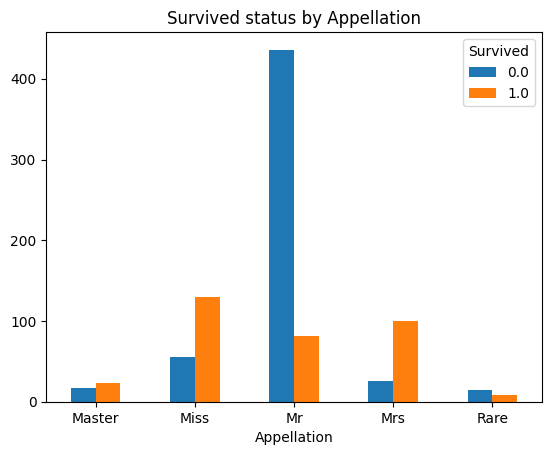

In [90]:
#绘制柱形图
Appellation_Survived = pd.crosstab(df_train['Appellation'], df_train['Survived'])
Appellation_Survived.plot(kind = 'bar')
plt.xticks(np.arange(len(Appellation_Survived.index)), Appellation_Survived.index, rotation = 360)
plt.title('Survived status by Appellation')

是不是看到Miss和Mrs的生存率远远高于Mr？可以得出名字头衔和生存率有关的结论吗？  
实际是Mr，Miss和Mrs头衔和性别关联，最后是性别影响的生存率。  

另外有头衔的总体生存率应该高于平均，这也是因为有头衔的一般舱位比较好，最后是舱位生存率的体现。  


### 3.5 Age

Text(0.5, 1.0, 'Survived status by GroupAge')

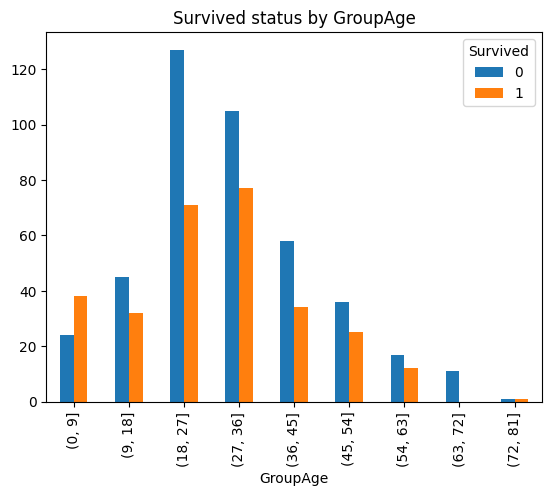

In [91]:
#对Age进行分组: 2**10>891分成10组, 组距为(最大值80-最小值0)/10 =8取9
bins = [0, 9, 18, 27, 36, 45, 54, 63, 72, 81, 90]
train['GroupAge'] = pd.cut(train.Age, bins)
GroupAge_Survived = pd.crosstab(train['GroupAge'], train['Survived'])
GroupAge_Survived.plot(kind = 'bar')
plt.title('Survived status by GroupAge')


In [15]:
可以看到，生存率最高的是孩子，相对比较低的反倒是青年18-27这组。

### 3.6 SibSp
从之前的描述性统计了解到, 兄弟姐妹与配偶的人数最多为8, 最少为0, 哪个更容易生存呢?

Text(0.5, 1.0, 'Survived status by SibSp')

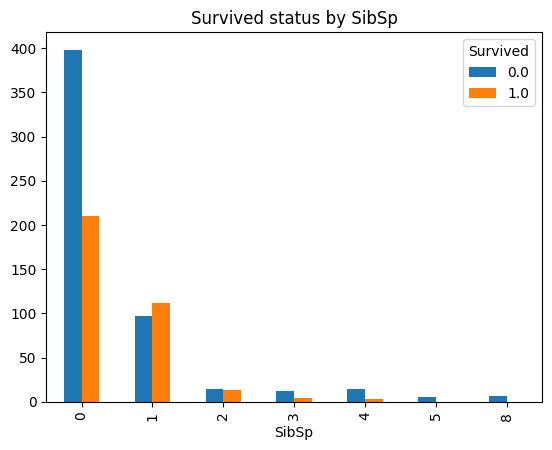

In [92]:
#生成列联表
SibSp_Survived = pd.crosstab(df_train['SibSp'], df_train['Survived'])
SibSp_Survived.plot(kind = 'bar')
plt.title('Survived status by SibSp')

可以看到, 大部分的SibSp为0, 且幸存率不大, 当SibSp数量为1,2时幸存率又有所增加, 再往上又降低.是不是可以理解为一个人的没人帮，2，3个人互相帮忙效果好一点。人再多就互相拖累了。

### 3.7 Parch
通过上面的描述性统计了解到, 同样也可以分为大家庭(最多为6), 小家庭(最小为0), 他们的幸存率如何呢?

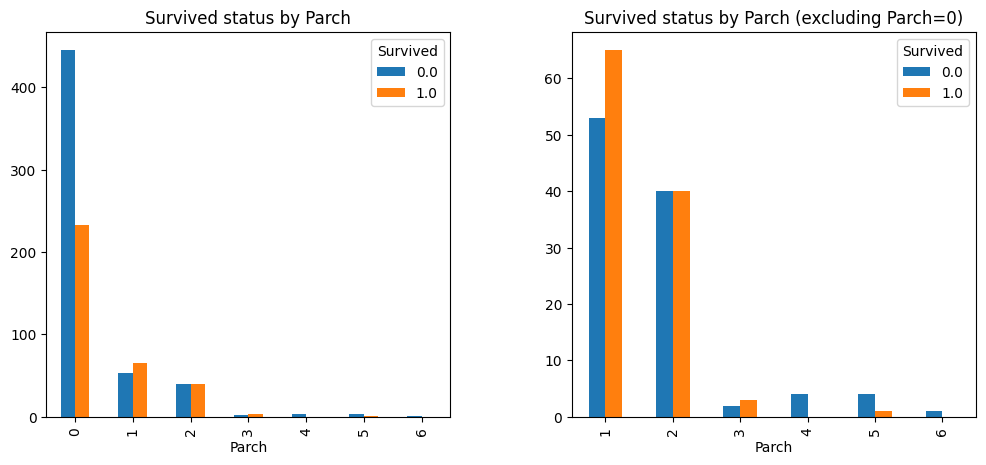

In [93]:


# 创建 Parch 和 Survived 的列联表
Parch_Survived = pd.crosstab(df_train['Parch'], df_train['Survived'])

# 创建一个 figure 和两个子图（axes），两个子图水平排列
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# 在第一个子图上绘制全部数据的柱状图
Parch_Survived.plot(kind='bar', ax=ax1)
ax1.set_title('Survived status by Parch')

# 在第二个子图上绘制除了 Parch=0 的数据外的柱状图
Parch_Survived_filtered = Parch_Survived.drop(0, axis=0)  # 删除 Parch=0 的行
Parch_Survived_filtered.plot(kind='bar', ax=ax2)
ax2.set_title('Survived status by Parch (excluding Parch=0)')

# 调整子图之间的空间
plt.subplots_adjust(wspace=0.3)  # 调整子图间的宽度空间

# 显示图形
plt.show()


因为parch=0的数据太多，柱状图影响了3以上的数据的显示，所以右侧去掉parch=0的数据重新绘制了一个表格。  
可以看到和兄弟类似，家庭其他成员为1或2（总共2，3人）的生存几率最高。

### 3.8 Embarked
生存机会和登船的港口有关系吗？

Text(0.5, 1.0, 'Survived status by Embarked')

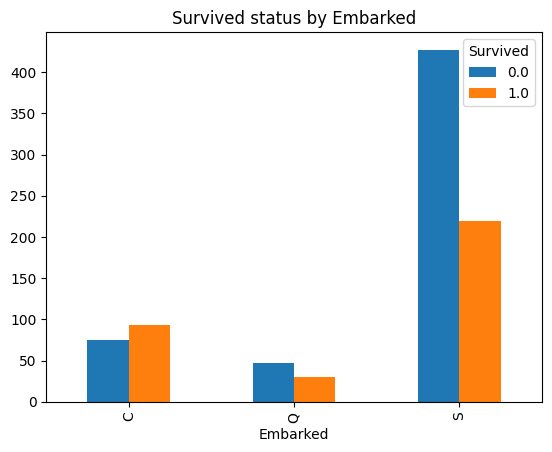

In [94]:
#绘制柱形图
Embarked_Survived = pd.crosstab(df_train['Embarked'], df_train['Survived'])
Embarked_Survived.plot(kind = 'bar')
plt.title('Survived status by Embarked') 

可以看到C港登船的旅客的生存率明显高。这个的具体原因可能需要更深一些的社会背景分析了。  
比如C港登船的头等舱旅客（富人）比较多一类。再做一个图表验证一下自己的想法。

Text(0.5, 1.0, 'PClasss status by Embarked')

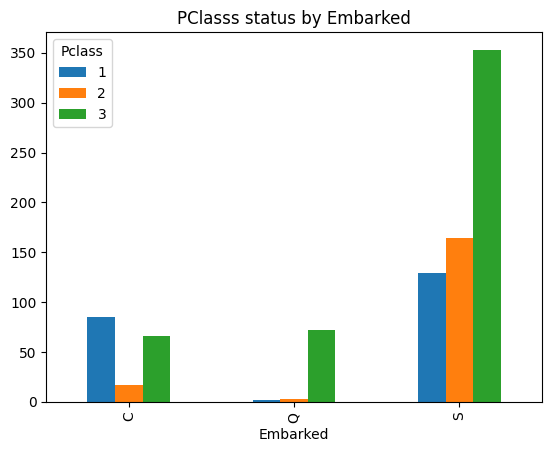

In [95]:
#绘制柱形图
Embarked_Survived = pd.crosstab(df_train['Embarked'], df_train['Pclass'])
Embarked_Survived.plot(kind = 'bar')
plt.title('PClasss status by Embarked') 

确实，C港登船的头等舱旅客比例是最高的。     
但是又有有趣的事情，Q港登船的旅客基本都是3等舱的，但是从前面的图表看出，Q港登船的旅客生存率相比S港明显高很多，但是这里看到Q港登船的旅客大都是3等舱，和前面3等生存率较低有矛盾。如果想知道具体原因，还需要更多的分析。这里就不研究了。  



### 3.9 Ticket
总人数891, 船票有681, 说明部分人共用一张票, 什么人能共用一张票呢? 想必应该认识, 就需要对他们进行归类, 共用票的分为一类, 独自使用的分为一类:

Text(0.5, 1.0, 'Survived status by GroupTicket')

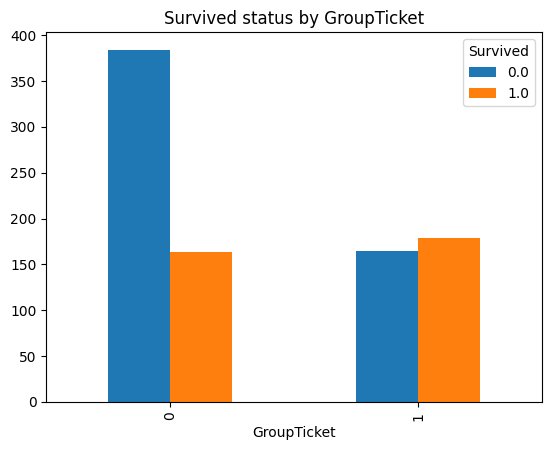

In [96]:
#计算每张船票使用的人数
Ticket_Count = df_train.groupby('Ticket', as_index = False)['PassengerId'].count()
#获取使用人数为1的船票
Ticket_Count_0 = Ticket_Count[Ticket_Count.PassengerId == 1]['Ticket']
#当船票在已经筛选出使用人数为1的船票中时, 将0赋值给GroupTicket, 否则将1赋值给GroupTicket
df_train['GroupTicket'] = np.where(df_train.Ticket.isin(Ticket_Count_0), 0, 1)
#绘制柱形图
GroupTicket_Survived = pd.crosstab(df_train['GroupTicket'], df_train['Survived'])
GroupTicket_Survived.plot(kind = 'bar')
plt.title('Survived status by GroupTicket')

### 3.10 Fare
票价。最小为0, 最大为512.3292, 生存率到底和票价有没有关系呢?对Fare进行分组对比:

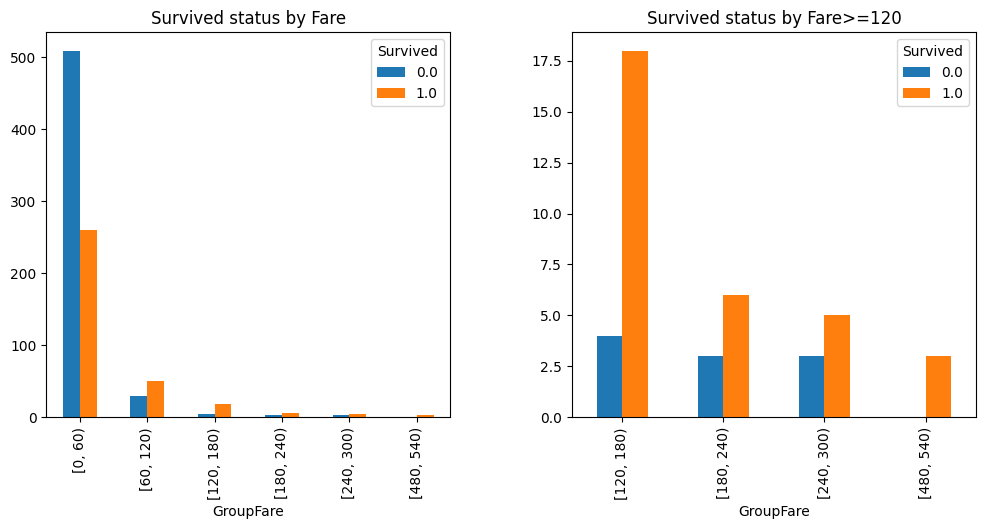

In [67]:
#对Fare进行分组: 2**10>891分成10组, 组距为(最大值512.3292-最小值0)/10取值60
bins = [0, 60, 120, 180, 240, 300, 360, 420, 480, 540, 600]
df_train['GroupFare'] = pd.cut(df_train.Fare, bins, right = False)
GroupFare_Survived = pd.crosstab(df_train['GroupFare'], df_train['Survived'])

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

GroupFare_Survived.plot(kind = 'bar', ax=ax1)
ax1.set_title('Survived status by Fare')

GroupFare_Survived.iloc[2:].plot(kind = 'bar', ax=ax2)
ax2.set_title('Survived status by Fare>=120')

# 调整子图之间的空间
plt.subplots_adjust(wspace=0.3)  # 调整子图间的宽度空间

# 显示图形
plt.show()

### 3.11 Cabin
票价。最小为0, 最大为512.3292, 生存率到底和票价有没有关系呢?对Fare进行分组对比:

Text(0.5, 1.0, 'Survived status by GroupCabin')

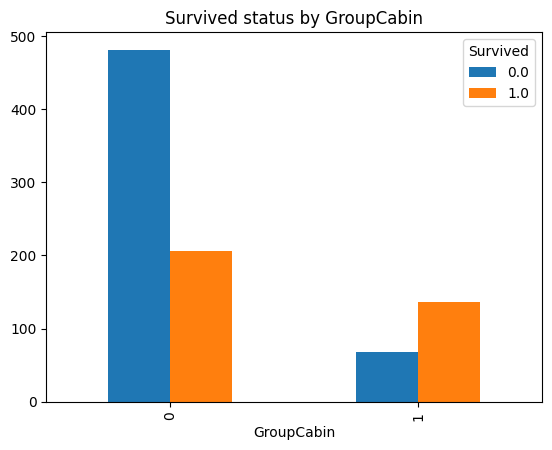

In [97]:
#将没有舱位的归为0, 有舱位归为1.
df_train['GroupCabin'] = np.where(df_train.Cabin == 'U', 0, 1)
#绘制柱形图
GroupCabin_Survived = pd.crosstab(df_train['GroupCabin'], df_train['Survived'])
GroupCabin_Survived.plot(kind = 'bar')
plt.title('Survived status by GroupCabin')

## 4. 数据加工
通过以上的分析, 我们已经了解到生存率相关的特征:  

Pclass, Appellation(Name中提取), Sex, GroupAge(对Age分组), SibSp, Parch, GroupTicket(对Ticket分组), GroupFare(对Fare分组), GroupCabin(对Cabin分组), Embarked.  

我们下面需要尽量把一些参数数字化和离散化（分组），这样方便参与运算。

1. Pclass中没有更多信息可供提取, 且为定量变量, 这里不作处理. 

2. Appellation是定性变量, 将其转化为定量变量: 

In [98]:
df_train['Appellation'] = df_train.Appellation.map({'Mr': 0, 'Mrs': 1, 'Miss': 2, 'Master': 3, 'Rare': 4})
df_train.Appellation.unique()

array([0, 1, 2, 3, 4], dtype=int64)

3. Sex是定性变量, 将其转化为定量变量, 即用0表示female, 1表示male

In [99]:
df_train['Sex'] = df_train['Sex'].map({'female': 0, 'male': 1})
df_train.Sex.unique()

array([1, 0], dtype=int64)

4. 按照GroupAge特征的范围将Age分为10组.

In [100]:

df_train.loc[df_train['Age'] < 9, 'Age'] = 0
df_train.loc[(df_train['Age'] >= 9) & (df_train['Age'] < 18), 'Age'] = 1
df_train.loc[(df_train['Age'] >= 18) & (df_train['Age'] < 27), 'Age'] = 2
df_train.loc[(df_train['Age'] >= 27) & (df_train['Age'] < 36), 'Age'] = 3
df_train.loc[(df_train['Age'] >= 36) & (df_train['Age'] < 45), 'Age'] = 4
df_train.loc[(df_train['Age'] >= 45) & (df_train['Age'] < 54), 'Age'] = 5
df_train.loc[(df_train['Age'] >= 54) & (df_train['Age'] < 63), 'Age'] = 6
df_train.loc[(df_train['Age'] >= 63) & (df_train['Age'] < 72), 'Age'] = 7
df_train.loc[(df_train['Age'] >= 72) & (df_train['Age'] < 81), 'Age'] = 8
df_train.loc[(df_train['Age'] >= 81) & (df_train['Age'] < 90), 'Age'] = 9
df_train.Age.unique()

array([2., 4., 3., 6., 0., 1., 7., 5., 8.])

 5. 将SibSp和Parch这两个特征组合成FamilySize特征

In [101]:
#当SibSp和Parch都为0时, 则孤身一人.
df_train['FamilySize'] = df_train['SibSp'] + df_train['Parch'] + 1
df_train.FamilySize.unique()

array([ 2,  1,  5,  3,  7,  6,  4,  8, 11], dtype=int64)

 6. GroupTicket是定量变量, 不作处理

 7. 按照GroupFare特征的范围将Fare分成10组:

In [102]:
df_train.loc[df_train['Fare'] < 60, 'Fare'] = 0
df_train.loc[(df_train['Fare'] >= 60) & (df_train['Fare'] < 120), 'Fare'] = 1
df_train.loc[(df_train['Fare'] >= 120) & (df_train['Fare'] < 180), 'Fare'] = 2
df_train.loc[(df_train['Fare'] >= 180) & (df_train['Fare'] < 240), 'Fare'] = 3
df_train.loc[(df_train['Fare'] >= 240) & (df_train['Fare'] < 300), 'Fare'] = 4
df_train.loc[(df_train['Fare'] >= 300) & (df_train['Fare'] < 360), 'Fare'] = 5
df_train.loc[(df_train['Fare'] >= 360) & (df_train['Fare'] < 420), 'Fare'] = 6
df_train.loc[(df_train['Fare'] >= 420) & (df_train['Fare'] < 480), 'Fare'] = 7
df_train.loc[(df_train['Fare'] >= 480) & (df_train['Fare'] < 540), 'Fare'] = 8
df_train.loc[(df_train['Fare'] >= 540) & (df_train['Fare'] < 600), 'Fare'] = 9
df_train.Fare.unique()

array([0., 1., 4., 2., 8., 3.])

8. GroupCabin是定量变量, 不作处理

9. Embarked是定类变量, 转化为定量变量.

In [103]:
df_train['Embarked'] = df_train.Embarked.map({'S': 0, 'C': 1, 'Q': 2})
df_train.Embarked.unique()


array([0, 1, 2], dtype=int64)

删除重复多余的以及与Survived不相关的:

In [105]:
df_train.drop(['PassengerId', 'Name', 'SibSp', 'Parch', 'Ticket', 'Cabin'], axis = 1, inplace =True)
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Survived     891 non-null    float64
 1   Pclass       891 non-null    int64  
 2   Sex          891 non-null    int64  
 3   Age          891 non-null    float64
 4   Fare         891 non-null    float64
 5   Embarked     891 non-null    int64  
 6   Appellation  891 non-null    int64  
 7   GroupTicket  891 non-null    int32  
 8   GroupCabin   891 non-null    int32  
 9   FamilySize   891 non-null    int64  
dtypes: float64(3), int32(2), int64(5)
memory usage: 62.8 KB


## 5. 实现模型   
对于同一个问题，有多种不同的模型可以选择，而且没有确定的规则，很多时候需要根据经验或者尝试比较才能找到合适这个问题的。  

对于不同的模型，可能也需要调整参数以达到最优。这是一个漫长和需要耐心的过程。  



### 5.1 线性回归模型

我们先使用入门的线性回归模型

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

warnings.filterwarnings('ignore')
 
# 加载数据
def load_dataset(trainfile, testfile):
    # 读入文件数据
    train = pd.read_csv(trainfile)
    test = pd.read_csv(testfile)
    train['Age'] = train['Age'].fillna(train['Age'].median())
    test['Age'] = test['Age'].fillna(test['Age'].median())
    # replace all the occurences of male with the number 0
    train.loc[train['Sex'] == 'male', 'Sex'] = 0
    train.loc[train['Sex'] == 'female', 'Sex'] = 1
    test.loc[test['Sex'] == 'male', 'Sex'] = 0
    test.loc[test['Sex'] == 'female', 'Sex'] = 1
    # .fillna() 为数据填充函数  用括号里面的东西填充
    train['Embarked'] = train['Embarked'].fillna('S')
    train.loc[train['Embarked'] == 'S', 'Embarked'] = 0
    train.loc[train['Embarked'] == 'C', 'Embarked'] = 1
    train.loc[train['Embarked'] == 'Q', 'Embarked'] = 2
    test['Embarked'] = test['Embarked'].fillna('S')
    test.loc[test['Embarked'] == 'S', 'Embarked'] = 0
    test.loc[test['Embarked'] == 'C', 'Embarked'] = 1
    test.loc[test['Embarked'] == 'Q', 'Embarked'] = 2
    test['Fare'] = test['Fare'].fillna(test['Fare'].median())
    traindata, trainlabel = train.drop('Survived', axis=1), train['Survived']  # train.pop('Survived')
    testdata = test
    # print(traindata.shape, trainlabel.shape, testdata.shape)
    # (891, 11) (891,) (418, 11)
    return traindata, trainlabel, testdata
 
def linear_regression_train(epoch, traindata, trainlabel, testdata):
    # the columns we'll use to predict the target
    all_variables = ['PassengerID', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
                     'Ticket', 'Fare', 'Cabin', 'Embarked']
    predictors = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
    traindata, testdata = traindata[predictors], testdata[predictors]
    # print(traindata.shape, trainlabel.shape, testdata.shape)  # (891, 7) (891,) (418, 7)
    # print(testdata.info())
    trainSet, testSet, trainlabel, testlabel = train_test_split(traindata, trainlabel,
                                                                test_size=0.2)
    # initialize our algorithm class
    clf = LinearRegression()
    # training the algorithm using the predictors and target
    clf.fit(trainSet, trainlabel)
    
    y_pred = clf.predict(testSet)
    
    # 将预测结果以0.5为阙值分类
    y_pred[y_pred>=0.5] = 1
    y_pred[y_pred<0.5] = 0
    
    matches = y_pred == testlabel
    # 计算预测正确的数量
    num_matches = np.sum(matches)
    test_accuracy = num_matches/len(testlabel)
    
    print("epoch: %d 正确率为 %s%%" % (epoch, test_accuracy)) 
    return test_accuracy
    
if __name__ == '__main__':
    # 因为随机分配训练集和测试集，可能对结果有影响。这里连续测试40轮取最佳值和平均值来评估模型的质量
    Epoch = 40
    total_accuracy = 0
    best_accuracy = 0
    for epoch in range(Epoch):
        trainfile = 'titanic/train.csv'
        testfile = 'titanic/test.csv'
        traindata, trainlabel, testdata = load_dataset(trainfile, testfile)
        accuracy = linear_regression_train(epoch, traindata, trainlabel, testdata)
        total_accuracy += accuracy
        if accuracy>best_accuracy:
            best_accuracy = accuracy
    print("最佳准确率：", best_accuracy, "平均准确率：", total_accuracy/Epoch)

epoch: 0 正确率为 0.8268156424581006%
epoch: 1 正确率为 0.8547486033519553%
epoch: 2 正确率为 0.7988826815642458%
epoch: 3 正确率为 0.7430167597765364%
epoch: 4 正确率为 0.7374301675977654%
epoch: 5 正确率为 0.7541899441340782%
epoch: 6 正确率为 0.8156424581005587%
epoch: 7 正确率为 0.7877094972067039%
epoch: 8 正确率为 0.8100558659217877%
epoch: 9 正确率为 0.8212290502793296%
epoch: 10 正确率为 0.7932960893854749%
epoch: 11 正确率为 0.8100558659217877%
epoch: 12 正确率为 0.8435754189944135%
epoch: 13 正确率为 0.7988826815642458%
epoch: 14 正确率为 0.8044692737430168%
epoch: 15 正确率为 0.7877094972067039%
epoch: 16 正确率为 0.7877094972067039%
epoch: 17 正确率为 0.7988826815642458%
epoch: 18 正确率为 0.7877094972067039%
epoch: 19 正确率为 0.7150837988826816%
epoch: 20 正确率为 0.7932960893854749%
epoch: 21 正确率为 0.7932960893854749%
epoch: 22 正确率为 0.7932960893854749%
epoch: 23 正确率为 0.7988826815642458%
epoch: 24 正确率为 0.8268156424581006%
epoch: 25 正确率为 0.7653631284916201%
epoch: 26 正确率为 0.8044692737430168%
epoch: 27 正确率为 0.7541899441340782%
epoch: 28 正确率为 0.7541899441340

### 5.2  逻辑回归模型

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import KFold, train_test_split
from sklearn.ensemble import RandomForestClassifier
 
warnings.filterwarnings('ignore')
 
 
def load_dataset(trainfile, testfile):
    train = pd.read_csv(trainfile)
    test = pd.read_csv(testfile)
    train['Age'] = train['Age'].fillna(train['Age'].median())
    test['Age'] = test['Age'].fillna(test['Age'].median())
    # replace all the occurences of male with the number 0
    train.loc[train['Sex'] == 'male', 'Sex'] = 0
    train.loc[train['Sex'] == 'female', 'Sex'] = 1
    test.loc[test['Sex'] == 'male', 'Sex'] = 0
    test.loc[test['Sex'] == 'female', 'Sex'] = 1
    # .fillna() 为数据填充函数  用括号里面的东西填充
    train['Embarked'] = train['Embarked'].fillna('S')
    train.loc[train['Embarked'] == 'S', 'Embarked'] = 0
    train.loc[train['Embarked'] == 'C', 'Embarked'] = 1
    train.loc[train['Embarked'] == 'Q', 'Embarked'] = 2
    test['Embarked'] = test['Embarked'].fillna('S')
    test.loc[test['Embarked'] == 'S', 'Embarked'] = 0
    test.loc[test['Embarked'] == 'C', 'Embarked'] = 1
    test.loc[test['Embarked'] == 'Q', 'Embarked'] = 2
    test['Fare'] = test['Fare'].fillna(test['Fare'].median())
    traindata, trainlabel = train.drop('Survived', axis=1), train['Survived']  # train.pop('Survived')
    testdata = test
    # print(traindata.shape, trainlabel.shape, testdata.shape)
    # (891, 11) (891,) (418, 11)
    return traindata, trainlabel, testdata
 
def logistic_regression_train(epoch, traindata, trainlabel, testdata):
    # the columns we'll use to predict the target
    all_variables = ['PassengerID', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
                     'Ticket', 'Fare', 'Cabin', 'Embarked']
    predictors = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
    traindata, testdata = traindata[predictors], testdata[predictors]
    # print(traindata.shape, trainlabel.shape, testdata.shape)  # (891, 7) (891,) (418, 7)
    # print(testdata.info())
    trainSet, testSet, trainlabel, testlabel = train_test_split(traindata, trainlabel,
                                                                test_size=0.2) #, random_state=12345)
    # initialize our algorithm class
    clf = LogisticRegression()
    # training the algorithm using the predictors and target
    clf.fit(trainSet, trainlabel)
    test_accuracy = clf.score(testSet, testlabel) * 100
    print("epoch: %d 正确率为   %s%%" % (epoch, test_accuracy))  # 正确率为   81.56424581005587%
    # res = clf.predict(testdata)
    return test_accuracy
 
if __name__ == '__main__':
    # 因为随机分配训练集和测试集，可能对结果有影响。这里连续测试40轮取最佳值和平均值来评估模型的质量
    Epoch = 40
    total_accuracy = 0
    best_accuracy = 0
    for epoch in range(Epoch):
        trainfile = 'titanic/train.csv'
        testfile = 'titanic/test.csv'
        traindata, trainlabel, testdata = load_dataset(trainfile, testfile)
        accuracy = logistic_regression_train(epoch, traindata, trainlabel, testdata)
        total_accuracy += accuracy
        if accuracy>best_accuracy:
            best_accuracy = accuracy
    print("最佳准确率：", best_accuracy, "平均准确率：", total_accuracy/Epoch)

epoch: 0 正确率为   77.09497206703911%
epoch: 1 正确率为   77.6536312849162%
epoch: 2 正确率为   80.44692737430168%
epoch: 3 正确率为   79.88826815642457%
epoch: 4 正确率为   78.77094972067039%
epoch: 5 正确率为   75.97765363128491%
epoch: 6 正确率为   80.44692737430168%
epoch: 7 正确率为   83.79888268156425%
epoch: 8 正确率为   81.56424581005587%
epoch: 9 正确率为   74.30167597765363%
epoch: 10 正确率为   82.68156424581005%
epoch: 11 正确率为   78.77094972067039%
epoch: 12 正确率为   76.53631284916202%
epoch: 13 正确率为   76.53631284916202%
epoch: 14 正确率为   81.56424581005587%
epoch: 15 正确率为   78.77094972067039%
epoch: 16 正确率为   83.24022346368714%
epoch: 17 正确率为   77.09497206703911%
epoch: 18 正确率为   83.79888268156425%
epoch: 19 正确率为   82.68156424581005%
epoch: 20 正确率为   82.12290502793296%
epoch: 21 正确率为   82.68156424581005%
epoch: 22 正确率为   77.09497206703911%
epoch: 23 正确率为   77.09497206703911%
epoch: 24 正确率为   87.15083798882681%
epoch: 25 正确率为   79.88826815642457%
epoch: 26 正确率为   76.53631284916202%
epoch: 27 正确率为   77.6536312849162%
epoc

### 5.3  随机森林模型

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import KFold, train_test_split
from sklearn.ensemble import RandomForestClassifier
 
warnings.filterwarnings('ignore')
 
 
def load_dataset(trainfile, testfile):
    train = pd.read_csv(trainfile)
    test = pd.read_csv(testfile)
    train['Age'] = train['Age'].fillna(train['Age'].median())
    test['Age'] = test['Age'].fillna(test['Age'].median())
    # replace all the occurences of male with the number 0
    train.loc[train['Sex'] == 'male', 'Sex'] = 0
    train.loc[train['Sex'] == 'female', 'Sex'] = 1
    test.loc[test['Sex'] == 'male', 'Sex'] = 0
    test.loc[test['Sex'] == 'female', 'Sex'] = 1
    # .fillna() 为数据填充函数  用括号里面的东西填充
    train['Embarked'] = train['Embarked'].fillna('S')
    train.loc[train['Embarked'] == 'S', 'Embarked'] = 0
    train.loc[train['Embarked'] == 'C', 'Embarked'] = 1
    train.loc[train['Embarked'] == 'Q', 'Embarked'] = 2
    test['Embarked'] = test['Embarked'].fillna('S')
    test.loc[test['Embarked'] == 'S', 'Embarked'] = 0
    test.loc[test['Embarked'] == 'C', 'Embarked'] = 1
    test.loc[test['Embarked'] == 'Q', 'Embarked'] = 2
    test['Fare'] = test['Fare'].fillna(test['Fare'].median())
    traindata, trainlabel = train.drop('Survived', axis=1), train['Survived']  # train.pop('Survived')
    testdata = test
    #print(traindata.shape, trainlabel.shape, testdata.shape)
    # (891, 11) (891,) (418, 11)
    return traindata, trainlabel, testdata
 
 
def random_forestclassifier_train(epoch, traindata, trainlabel, testdata):
    predictors = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
    traindata, testdata = traindata[predictors], testdata[predictors]
    # print(traindata.shape, trainlabel.shape, testdata.shape)  # (891, 7) (891,) (418, 7)
    # print(testdata.info())
    trainSet, testSet, trainlabel, testlabel = train_test_split(traindata, trainlabel,
                                                                test_size=0.2)#, random_state=12345)
    # initialize our algorithm class
    clf = RandomForestClassifier(random_state=1, n_estimators=100,
                                 min_samples_split=4, min_samples_leaf=2)
    # training the algorithm using the predictors and target
    clf.fit(trainSet, trainlabel)
    test_accuracy = clf.score(testSet, testlabel) * 100
    print("epoch: %d 正确率为   %s%%" % (epoch, test_accuracy))  # 正确率为   81.56424581005587%
    # res = clf.predict(testdata)
    return test_accuracy
 
if __name__ == '__main__':
    # 因为随机分配训练集和测试集，可能对结果有影响。这里连续测试40轮取最佳值和平均值来评估模型的质量
    Epoch = 40
    total_accuracy = 0
    best_accuracy = 0
    for epoch in range(Epoch):
        trainfile = 'titanic/train.csv'
        testfile = 'titanic/test.csv'
        traindata, trainlabel, testdata = load_dataset(trainfile, testfile)
        accuracy = random_forestclassifier_train(epoch, traindata, trainlabel, testdata)
        total_accuracy += accuracy
        if accuracy>best_accuracy:
            best_accuracy = accuracy
    print("最佳准确率：", best_accuracy, "平均准确率：", total_accuracy/Epoch)

epoch: 0 正确率为   84.35754189944134%
epoch: 1 正确率为   83.24022346368714%
epoch: 2 正确率为   82.68156424581005%
epoch: 3 正确率为   83.24022346368714%
epoch: 4 正确率为   84.35754189944134%
epoch: 5 正确率为   84.35754189944134%
epoch: 6 正确率为   80.44692737430168%
epoch: 7 正确率为   80.44692737430168%
epoch: 8 正确率为   80.44692737430168%
epoch: 9 正确率为   84.35754189944134%
epoch: 10 正确率为   81.00558659217877%
epoch: 11 正确率为   79.88826815642457%
epoch: 12 正确率为   83.24022346368714%
epoch: 13 正确率为   79.88826815642457%
epoch: 14 正确率为   84.91620111731844%
epoch: 15 正确率为   82.12290502793296%
epoch: 16 正确率为   79.3296089385475%
epoch: 17 正确率为   81.00558659217877%
epoch: 18 正确率为   77.6536312849162%
epoch: 19 正确率为   81.00558659217877%
epoch: 20 正确率为   83.24022346368714%
epoch: 21 正确率为   79.3296089385475%
epoch: 22 正确率为   80.44692737430168%
epoch: 23 正确率为   81.56424581005587%
epoch: 24 正确率为   84.91620111731844%
epoch: 25 正确率为   83.79888268156425%
epoch: 26 正确率为   76.53631284916202%
epoch: 27 正确率为   82.12290502793296%
epoch

### 5.3，集成学习模型
集成学习模型实际是将两者或以上的模型集合在一起对数据进行预测。

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import KFold, train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.ensemble import GradientBoostingClassifier
import re
 
warnings.filterwarnings('ignore')
 
 
# A function to get the title from a name
def get_title(name):
    # use a regular expression to search for a title
    title_search = re.search('([A-Za-z]+)\.', name)
    # if the title exists, extract and return it
    if title_search:
        return title_search.group(1)
    return ''
 
 
def load_dataset(trainfile, testfile):
    train = pd.read_csv(trainfile)
    test = pd.read_csv(testfile)
    train['Age'] = train['Age'].fillna(train['Age'].median())
    test['Age'] = test['Age'].fillna(test['Age'].median())
    # replace all the occurences of male with the number 0
    train.loc[train['Sex'] == 'male', 'Sex'] = 0
    train.loc[train['Sex'] == 'female', 'Sex'] = 1
    test.loc[test['Sex'] == 'male', 'Sex'] = 0
    test.loc[test['Sex'] == 'female', 'Sex'] = 1
    # .fillna() 为数据填充函数  用括号里面的东西填充
    train['Embarked'] = train['Embarked'].fillna('S')
    train.loc[train['Embarked'] == 'S', 'Embarked'] = 0
    train.loc[train['Embarked'] == 'C', 'Embarked'] = 1
    train.loc[train['Embarked'] == 'Q', 'Embarked'] = 2
    test['Embarked'] = test['Embarked'].fillna('S')
    test.loc[test['Embarked'] == 'S', 'Embarked'] = 0
    test.loc[test['Embarked'] == 'C', 'Embarked'] = 1
    test.loc[test['Embarked'] == 'Q', 'Embarked'] = 2
    test['Fare'] = test['Fare'].fillna(test['Fare'].median())
    # generating a familysize column  是指所有的家庭成员
    train['FamilySize'] = train['SibSp'] + train['Parch']
    test['FamilySize'] = test['SibSp'] + test['Parch']
 
    # the .apply method generates a new series
    train['NameLength'] = train['Name'].apply(lambda x: len(x))
    test['NameLength'] = test['Name'].apply(lambda x: len(x))
 
    titles_train = train['Name'].apply(get_title)
    titles_test = test['Name'].apply(get_title)
    title_mapping = {
        'Mr': 1,
        'Miss': 2,
        'Mrs': 3,
        'Master': 4,
        'Rev': 6,
        'Dr': 5,
        'Col': 7,
        'Mlle': 8,
        'Ms': 2,
        'Major': 7,
        'Don': 9,
        'Countess': 10,
        'Mme': 8,
        'Jonkheer': 10,
        'Sir': 9,
        'Dona': 9,
        'Capt': 7,
        'Lady': 10,
    }
    for k, v in title_mapping.items():
        titles_train[titles_train == k] = v
    train['Title'] = titles_train
    for k, v in title_mapping.items():
        titles_test[titles_test == k] = v
    test['Title'] = titles_test
    # print(pd.value_counts(titles_train))
    traindata, trainlabel = train.drop('Survived', axis=1), train['Survived']  # train.pop('Survived')
    testdata = test
    # print(traindata.shape, trainlabel.shape, testdata.shape)
    # (891, 11) (891,) (418, 11)
    return traindata, trainlabel, testdata
 
 
'''
def emsemble_model_train(traindata, trainlabel, testdata):
    # the algorithms we want to ensemble
    # we're using the more linear predictors for the logistic regression,
    # and everything with the gradient boosting classifier
    algorithms = [
        [GradientBoostingClassifier(random_state=1, n_estimators=25, max_depth=3),
         ['Pclass', 'Sex', 'Fare', 'FamilySize', 'Title', 'Age', 'Embarked', ]],
        [LogisticRegression(random_state=1),
         ['Pclass', 'Sex', 'Fare', 'FamilySize', 'Title', 'Age', 'Embarked', ]]
    ]
    # initialize the cross validation folds
    kf = KFold(n_splits=3, random_state=1)
    predictions = []
    for train_index, test_index in kf.split(traindata):
        # print(train_index, test_index)
        full_test_predictions = []
        for alg, predictors in algorithms:
            train_predictors = (traindata[predictors].iloc[train_index, :])
            train_target = trainlabel.iloc[train_index]
            alg.fit(train_predictors, train_target)
            test_predictions = alg.predict(traindata[predictors].iloc[test_index, :])
            full_test_predictions.append(test_predictions)
        # use a simple ensembling scheme
        test_predictions = (full_test_predictions[0] + full_test_predictions[1]) / 2
        test_predictions[test_predictions <= 0.5] = 0
        test_predictions[test_predictions >= 0.5] = 1
        predictions.append(test_predictions)
    predictions = np.concatenate(predictions, axis=0)
    # compute accuracy bu comparing to the training data
    accuracy = sum(predictions[predictions == trainlabel]) / len(predictions)
    print(accuracy)
 '''
def emsemble_model_train(epoch, traindata, trainlabel, testdata):
    # the algorithms we want to ensemble
    # we're using the more linear predictors for the logistic regression,
    # and everything with the gradient boosting classifier
    predictors = ['Pclass', 'Sex', 'Fare', 'FamilySize', 'Title', 'Age', 'Embarked', ]
    traindata, testdata = traindata[predictors], testdata[predictors]
    trainSet, testSet, trainlabel, testlabel = train_test_split(traindata, trainlabel,
                                                                test_size=0.2) #, random_state=12345)
    # initialize our algorithm class
    clf1 = GradientBoostingClassifier(random_state=1, n_estimators=25, max_depth=3)
    clf2 = LogisticRegression(random_state=1)
    # training the algorithm using the predictors and target
    clf1.fit(trainSet, trainlabel)
    clf2.fit(trainSet, trainlabel)
    test_accuracy1 = clf1.score(testSet, testlabel) * 100
    test_accuracy2 = clf2.score(testSet, testlabel) * 100
    print(test_accuracy1, test_accuracy2)  # 78.77094972067039   80.44692737430168
    test_accuracy = (test_accuracy1+test_accuracy2)/2
    print("epoch: %d 正确率为   %s%%" % (epoch, test_accuracy))  # 正确率为   81.56424581005587%
    # res = clf.predict(testdata)
    return test_accuracy
 
 
if __name__ == '__main__':
    '''
    trainfile = 'titanic/train.csv'
    testfile = 'titanic/test.csv'
    traindata, trainlabel, testdata = load_dataset(trainfile, testfile)
    emsemble_model_train(traindata, trainlabel, testdata)
    '''
    
    # 因为随机分配训练集和测试集，可能对结果有影响。这里连续测试40轮取最佳值和平均值来评估模型的质量
    Epoch = 40
    total_accuracy = 0
    best_accuracy = 0
    for epoch in range(Epoch):
        trainfile = 'titanic/train.csv'
        testfile = 'titanic/test.csv'
        traindata, trainlabel, testdata = load_dataset(trainfile, testfile)
        accuracy = emsemble_model_train(epoch, traindata, trainlabel, testdata)
        total_accuracy += accuracy
        if accuracy>best_accuracy:
            best_accuracy = accuracy
    print("最佳准确率：", best_accuracy, "平均准确率：", total_accuracy/Epoch)

84.35754189944134 83.79888268156425
epoch: 0 正确率为   84.07821229050279%
79.3296089385475 75.97765363128491
epoch: 1 正确率为   77.6536312849162%
83.79888268156425 82.68156424581005
epoch: 2 正确率为   83.24022346368716%
79.88826815642457 79.3296089385475
epoch: 3 正确率为   79.60893854748603%
82.68156424581005 82.68156424581005
epoch: 4 正确率为   82.68156424581005%
79.88826815642457 79.3296089385475
epoch: 5 正确率为   79.60893854748603%
80.44692737430168 78.2122905027933
epoch: 6 正确率为   79.3296089385475%
86.03351955307262 82.68156424581005
epoch: 7 正确率为   84.35754189944134%
78.2122905027933 75.97765363128491
epoch: 8 正确率为   77.0949720670391%
87.70949720670392 84.35754189944134
epoch: 9 正确率为   86.03351955307264%
81.56424581005587 77.09497206703911
epoch: 10 正确率为   79.3296089385475%
79.88826815642457 77.6536312849162
epoch: 11 正确率为   78.77094972067039%
82.12290502793296 79.88826815642457
epoch: 12 正确率为   81.00558659217876%
82.12290502793296 79.3296089385475
epoch: 13 正确率为   80.72625698324023%
76.5363128491